In [58]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Plotting word frequency

Count the number of word occurrances in the following text and produce a map that scales each word to number of occurrances

In [2]:
# text fields. 
text=("Python Python Python C Java JavaScript jQuery jQuery R Python Python SQL HTML Lisp Java Ruby jQuery Python Python Django Scala Python JavaScript jQuery")

In [3]:
 wordcloud=WordCloud(width=500,height=500,margin=1).generate(text)

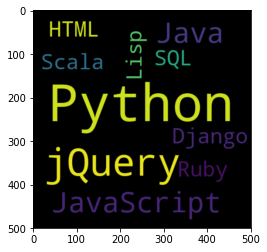

In [11]:
plt.imshow(wordcloud,interpolation='bilinear')

In [17]:
# borked
# plt.axis('off')
# plt.margins(x=0,y=0)
# plt.show()

In [12]:
wordcloud=WordCloud(height=500,width=500, background_color='darkturquoise').generate(text)

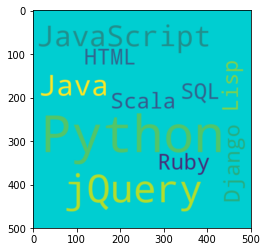

In [13]:
plt.imshow(wordcloud,interpolation='bilinear')

In [14]:
wordcloud=WordCloud(height=500,width=500,background_color='white', colormap='plasma').generate(text)

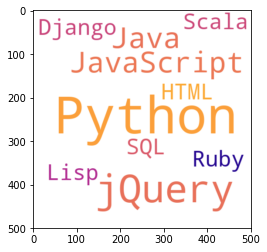

In [15]:
plt.imshow(wordcloud,interpolation='bilinear')

### Other examples

**Plotting from dictionaries**

The dictionary is a percentage summary for each token. Size the word based on the percentage value

In this example it shows that we can grab max_words without pre-filtering from the data structure

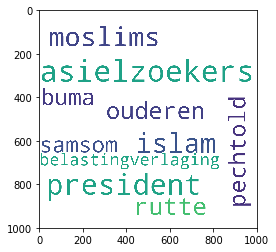

In [20]:
dictionary = {u'asielzoekers': 0.0034861170591325486,
 u'belastingverlaging': 0.0018551991553514675,
 u'buma': 0.0020712555982839408,
 u'islam': 0.0029519544163739155,
 u'moslims': 0.0027958002747301355,
 u'ouderen': 0.0022803123245457566,
 u'pechtold': 0.0021525864470786928,
 u'president': 0.003281844532743345,
 u'rutte': 0.0023488684001475584,
 u'samsom': 0.0019304632325980841} 



from PIL import Image
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dictionary)
plt.imshow(wc)

**Shaping Word Cloud images**

From https://medium.com/@dudsdu/an-example-of-word-cloud-with-mask-4cbbd699fb14

Grabbing data from Metamorphosis word count

In [29]:
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words by white space
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]


In [37]:
len(words)

10081

In [30]:

# modules for generating the word cloud
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Complex image of family

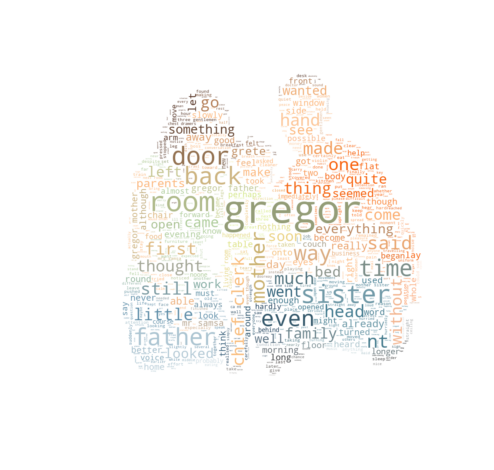

In [64]:
d = getcwd()
 # join all documents in corpus
text = " ".join(words)
## http://www.publicdomainpictures.net/view-image.php?image=232185&picture=family-gathering
# mask = np.array(Image.open(path.join(d, "family-gathering.jpg")))
# need to use the version with the family's outline cropped from the background.
# using the direct download produced a image with a yellow background, 
# making the cloud unreadable
image_coloring = np.array(Image.open(path.join(d, "family-gathering-cropped.png")))
image_colors = ImageColorGenerator(image_coloring)
wc = WordCloud(background_color="white", max_words=2000, mask=image_coloring,
               max_font_size=90, random_state=42)
wc.generate(text)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()


**Globe image**

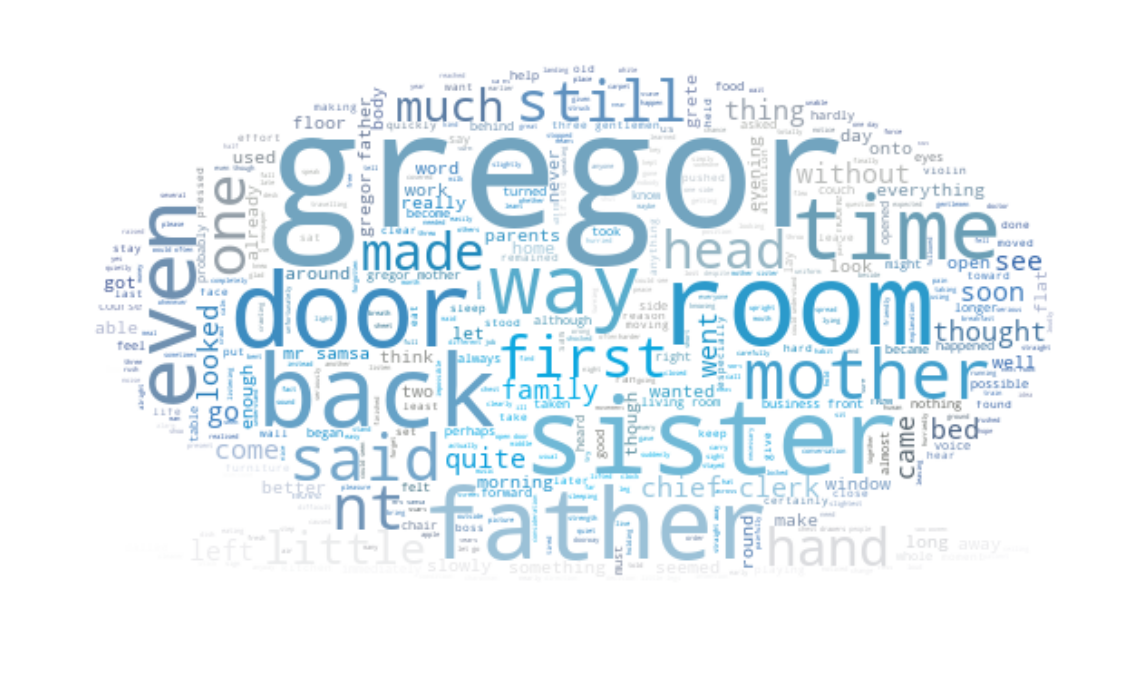

In [42]:
d = getcwd()
## join all documents in corpus
text = " ".join(words)
mask = np.array(Image.open(path.join(d, "globe.jpg")))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=90, random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,12])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()

**Yellow House Mapping**

A function to generate maps accepting (data, mask) tuple. 
Masked by the image of a House with a housing vocabulary

In [67]:
staticwords = 'access guest guest apartment area area bathroom bed bed bed bed bed bedroom block coffee coffee coffee coffee entrance entry francisco free garden guest home house kettle kettle kitchen kitchen kitchen kitchen kitchen kitchen living located microwave neighborhood new park parking place privacy private queen room san separate separate shared space space space street suite time welcome'

In [55]:
mask = np.array(Image.open(path.join(d, "yellow-house-hi.png")))

In [56]:
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

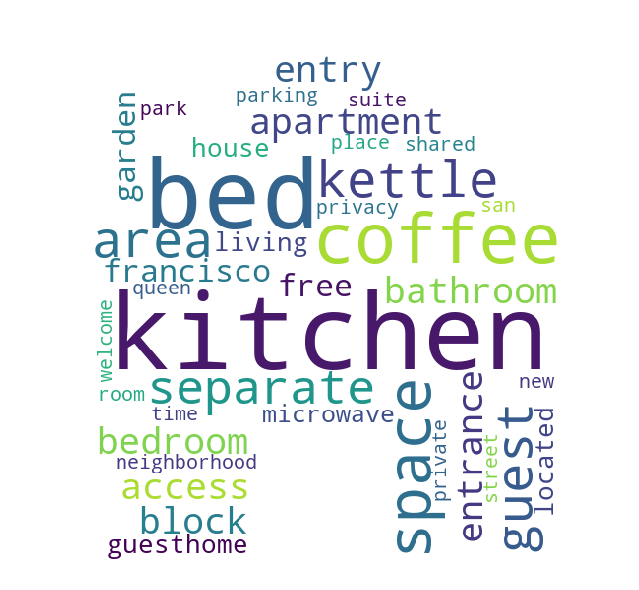

In [59]:
generate_wordcloud(staticwords, mask)

### Alice in Wonderland word overlay

from https://amueller.github.io/word_cloud/auto_examples/colored.html

Also shows a multiple plot with different coloring example

In [69]:
import os
from os import path

In [78]:
del alice_coloring

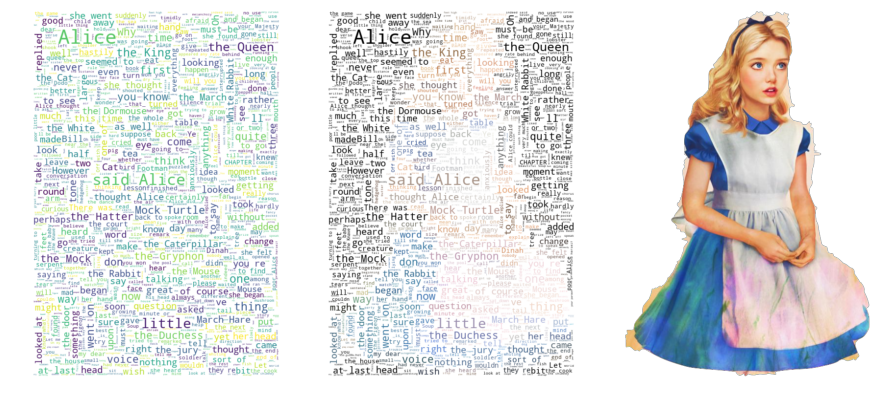

In [81]:

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'alice_in_wonderland.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
# Original must have background cropped or the image gets hard to read
alice_coloring = np.array(Image.open(path.join(d, "alice_color.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show

fig, axes = plt.subplots(1, 3, figsize=(15,8))
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()